### CASE STUDY

Context:

You work for a marketing agency that specialises in advertising analytics. Your client is a consumer goods company that wants to understand the impact of their advertising efforts on product sales. They collected data on advertising expenditures through different channels (TV, radio, and newspaper) and corresponding sales figures. Your task is to analyse the dataset and build regression models to predict future sales based on advertising spending.


Tasks:

1. Load the dataset and describe the data (number of points, number missing values, etc.).
2. Create scatter plots to visualize the relationships between each advertising channel (TV, radio, newspaper) and sales.
3. For each of the advertising channels, build a simple linear regression model to predict sales based only on that channel. Interpret the regression coefficients and evaluate the model's performance using the R-squared method.
4. Which of the three advertising channels explains better by itself the level of sales?  
5. Build a multivariate linear regression model that includes all three advertising channels (TV, radio, newspaper) as independent variables to predict sales and evaluate the model's performance using the R-squared method. Is multivariate linear regression better than any of the models using only one variable?
6. Use the trained multivariate regression models to predict sales for new data points (predict datasheet). Which of the scenarios proposed in the datasheet forecasts a higher level of sales? 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



1. Load the dataset and describe the data (number of points, number missing values, etc.).

In [3]:
df = pd.read_excel('advertising_data.xlsx')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

It seems there are 200 data points with 4 columns

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is missing values in this dataset

2. Create scatter plots to visualize the relationships between each advertising channel (TV, radio, newspaper) and sales.


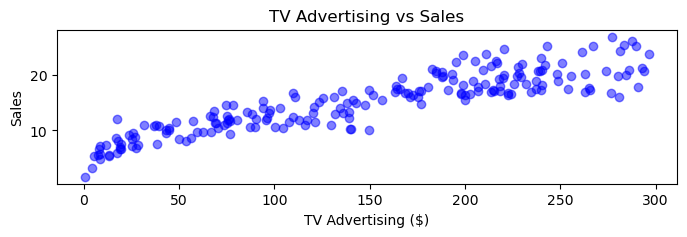

In [7]:
# Create scatter plot for TV vs sales
plt.figure(figsize=(8, 2))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.5)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales')

plt.show()

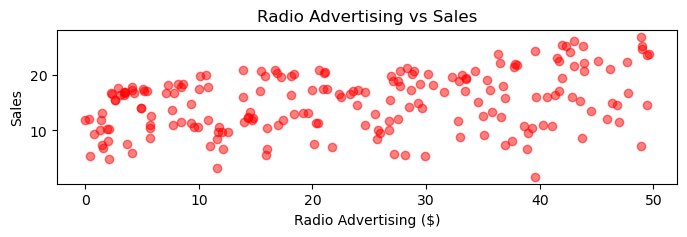

In [8]:
# Create scatter plot for radio vs sales
plt.figure(figsize=(8, 2))
plt.scatter(df['Radio'], df['Sales'], color='red', alpha=0.5)
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising ($)')
plt.ylabel('Sales')
plt.show()

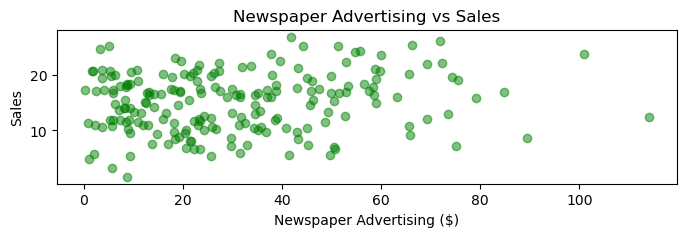

In [9]:
# Create scatter plot for newspaper vs sales
plt.figure(figsize=(8, 2))
plt.scatter(df['Newspaper'], df['Sales'], color='green', alpha=0.5)
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising ($)')
plt.ylabel('Sales')
plt.show()

3. For each of the advertising channels, build a simple linear regression model to predict sales based
only on that channel. Interpret the regression coefficients and evaluate the model's performance
using the R-squared method.

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


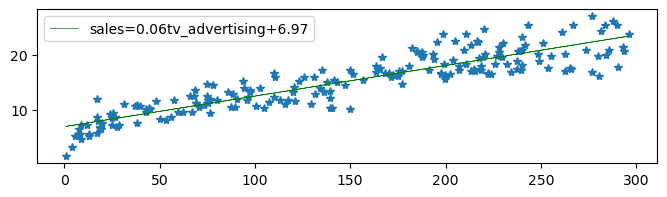

The equation for this model is: sales=0.06tv_advertising+6.97


In [16]:
tv_advertising = df.TV.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(tv_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'tv_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(tv_advertising)

plt.figure(figsize=(8,2))
plt.plot(tv_advertising,sales, '*')
plt.plot(tv_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

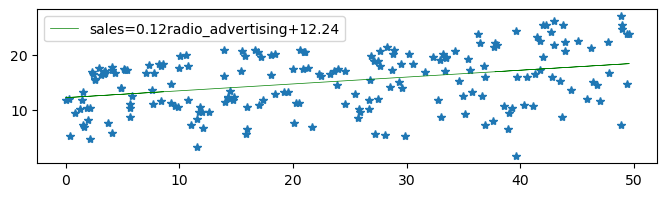

The equation for this model is: sales=0.12radio_advertising+12.24


In [15]:
radio_advertising = df.Radio.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(radio_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'radio_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(radio_advertising)

plt.figure(figsize=(8,2))
plt.plot(radio_advertising,sales, '*')
plt.plot(radio_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

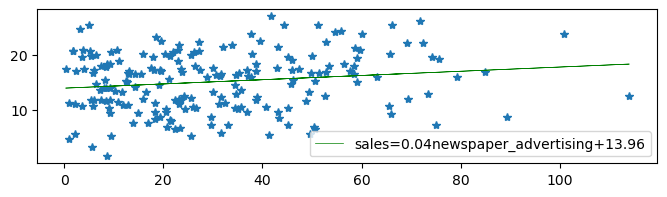

The equation for this model is: sales=0.04newspaper_advertising+13.96


In [17]:
newspaper_advertising = df.Newspaper.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(newspaper_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'newspaper_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(newspaper_advertising)

plt.figure(figsize=(8,2))
plt.plot(newspaper_advertising,sales, '*')
plt.plot(newspaper_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

In [18]:
print(my_model.score(newspaper_advertising, sales))

0.024951369862864836


In [19]:
print(my_model.score(radio_advertising, sales))

0.06089362201322823


In [20]:
print(my_model.score(tv_advertising, sales))

0.017183522824260167
